<a href="https://colab.research.google.com/github/NnekaAsuzu/Memory-Support-Chatbot-for-Pregnant-Women/blob/main/Memory_Support_Chatbot_for_Pregnant_Women_using_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proposal Title: Memory Support Chatbot for Pregnant Women.

Project Summary:
The proposed project is to develop a Memory Support Chatbox for Pregnant Women using the GPT-2 language model. The chatbox aims to provide support, solutions, tips, and advice for pregnant women experiencing cognitive memory issues. The goal is to offer a personalized and accessible resource for pregnant women to manage their cognitive memory challenges effectively.




Proposed Project and Reasoning:
The project is proposed to address the lack of easily accessible and personalized support for pregnant women facing cognitive memory issues. By leveraging the capabilities of the GPT-2 language model, the chatbox can provide instant responses and guidance, complementing the advice of healthcare professionals.

*Dictionary-Based DataFrame creation method: This method reads the text files into a list of dictionaries and then creates a pandas DataFrame from these dictionaries using streamlit as the User Interface. Model is fine-tuned*

Install Required Libraries

In [ ]:
# Libraries
!pip install streamlit   # Streamlit for creating interactive web apps
!pip install pandas      # Pandas for data manipulation and analysis
!pip install matplotlib  # Matplotlib for data visualization
!pip install nltk        # NLTK for natural language processing tasks
!pip install wordcloud   # Wordcloud for generating word clouds
!pip install transformers # Transformers for accessing the GPT-2 model  #library for accessing the GPT-2 model



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


Import Libraries

In [ ]:
import pandas as pd                  # Pandas for data manipulation and analysis
import nltk                          # NLTK for natural language processing tasks
from nltk.corpus import stopwords    # Stopwords from NLTK
from nltk.tokenize import word_tokenize   # Word tokenizer from NLTK
import streamlit as st               # Streamlit for creating interactive web apps
import matplotlib.pyplot as plt     # Matplotlib for data visualization
from wordcloud import WordCloud     # Wordcloud for generating word clouds
from transformers import GPT2Tokenizer, GPT2LMHeadModel   # GPT-2 model from Transformers
import torch                         # PyTorch for deep learning tasks
from torch.utils.data import DataLoader, Dataset,TensorDataset   # DataLoader and Dataset for handling data
from transformers import GPT2Config, GPT2LMHeadModel, AdamW     # AdamW optimizer for GPT-2 model
from transformers import AdamW, get_scheduler                    # Scheduler for optimizer
from torch.nn.utils.rnn import pad_sequence                      # Padding sequences for model input
from nltk.sentiment import SentimentIntensityAnalyzer            # Sentiment analysis from NLTK
from sklearn.feature_extraction.text import TfidfVectorizer      # TF-IDF vectorizer
from sklearn.decomposition import LatentDirichletAllocation      # LDA for topic modeling
nltk.download('vader_lexicon')  # Download the VADER lexicon for sentiment analysis
sia = SentimentIntensityAnalyzer()  # Initialize the SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# # Load the pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')    # GPT-2 tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')      # GPT-2 model
model.resize_token_embeddings(len(tokenizer))         # Resize token embeddings


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Embedding(50257, 768)

#Data Collection and Preparation: Clean the dataset by removing special characters, digits, and unnecessary whitespace

In [ ]:
# List of file paths for the TXT files
#Define the list of file paths for the TXT files
txt_files = [
    "/content/Cognition in Pregnancy- Perceptions and Performance, 2005-2006 - Dataset - B2FIND.txt",
    "/content/Frontiers | Cognitive disorder and associated factors among pregnant women attending antenatal servi.txt",
    "/content/Frustrated By Brain Fog? How Pregnancy Actually Alters Yo....txt",
    "/content/Is Pregnancy Brain Real?.txt",
    "/content/Is ‘pregnancy brain’ real or just a myth? | Your Pregnancy Matters | UT Southwestern Medical Center.txt",
    "/content/Memory and affective changes during the antepartum- A narrative review and integrative hypothesis- J.txt",
    "/content/Pregnancy 'does cause memory loss' | Medical research | The Guardian.txt",
    "/content/Pregnancy Brain — Forgetfulness During Pregnancy.txt",
    "/content/Pregnancy brain- When it starts and what causes pregnancy brain fog | BabyCenter.txt",
    "/content/Pregnancy does cause memory loss, study says - CNN.txt",
    "/content/Textbook J.A. Russell, A.J. Douglas, R.J. Windle, C.D. Ingram - The Maternal Brain_ Neurobiological and Neuroendocrine Adaptation and Disorders in Pregnancy & Post Partum-Elsevier Science (2001).txt",
    "/content/The effect of pregnancy on maternal cognition - PMC.txt",
    "/content/This Is Your Brain on Motherhood - The New York Times.txt",
    "/content/Working memory from pregnancy to postpartum.txt",
    "/content/What Is Mom Brain and Is It Real?.txt",
    "/content/Memory loss in Pregnancy- Myth or Fact? - International Forum for Wellbeing in Pregnancy.txt",
    "/content/Memory and mood changes in pregnancy- a qualitative content analysis of women’s first-hand accounts.txt",
    "/content/Is Mom Brain real? Understanding and coping with postpartum brain fog.txt",
    "/content/Everyday Life Memory Deficits in Pregnant Women.txt",
    "/content/Cognitive Function Decline in the Third Trimester.txt",
    "/content/'Mommy brain' might be a good thing, new research suggests | CBC Radio.txt"
]


In [ ]:
#Load and read the text files into a DataFrame
data = []
for file_path in txt_files:
    with open(file_path, "r") as file:
        text = file.read()
        data.append({"text": text})

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                                                 text
0   GO TO EUDAT WEBSITE \nDATA CATALOGUE REPOSITOR...
1   (Sections )(Sections )\nArticles Research Topi...
2   Dr. Aliabadi’s Elective DoubleMastectomy Journ...
3   Health Conditions Discover Plan Connect SUBSCR...
4   Find a Doctor Conditions & Treatments Location...
5   2 \nLog in | Register Cart\n\n! \n\n\nHome All...
6   Print subscriptions Search jobs \nSupport the ...
7   SearchSearch\nSign Up \ntIN THIS ARTICLE Getti...
8   Epidural for labor painReviewed by Cheryl Axel...
9   Health»Live TV International Edition + !!\nSha...
10  List of Contributors \n\nM. Altemus, Departmen...
11  AnoKcialwebsiteoftheUnitedStatesgovernment \n\...
12  ADVERTISEMENTPARENTINSharefullarticle 4\nPAREN...
13  Short Communication \nWorking memory from preg...
14  What Is Mom Brain and Is It Real? \n3/5/24, 3:...
15  Memory loss in Pregnancy: Myth or Fact? - Inte...
16  Memory and mood changes in pregnancy: a qualit...
17  Is Mom Brain real? \nUnd

##Data Cleaning and Manipulation

In [ ]:
# Tokenize the text
nltk.download('punkt')  # Download the 'punkt' tokenizer models for tokenization
df['tokens'] = df['text'].apply(word_tokenize) # Tokenize each text in the 'text' column into a list of words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Remove stopwords and special characters
nltk.download('stopwords')  # Download the stopwords corpus for English
stop_words = set(stopwords.words('english'))  # Load the English stopwords into a set


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Apply a lambda function to each tokenized list in the 'tokens' column
# This function converts each word to lowercase, removes non-alphanumeric characters, and filters out stopwords
df['cleaned_text'] = df['tokens'].apply(lambda x: [word.lower() for word in x if (word.isalnum() and word.lower() not in stop_words)])


In [ ]:
# Join tokens back into sentences
# Apply a lambda function to join the cleaned tokens back into a single string
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x))

In [ ]:
# Display the cleaned text
print(df['cleaned_text'])

0     go eudat website data catalogue repositories p...
1     sections sections articles research topics edi...
2     aliabadi elective doublemastectomy journeydo l...
3     health conditions discover plan connect subscr...
4     find doctor conditions treatments locations ac...
5     2 log register cart home journals journal clin...
6     print subscriptions search jobs support guardi...
7     searchsearch sign tin article getting pregnant...
8     epidural labor painreviewed cheryl axelrod lab...
9     health live tv international edition share mix...
10    list contributors altemus department psychiatr...
11    anokcialwebsiteoftheunitedstatesgovernment per...
12    advertisementparentinsharefullarticle 4 parent...
13    short communication working memory pregnancy p...
14    mom brain real pm search getting pregnant preg...
15    memory loss pregnancy myth fact international ...
16    memory mood changes pregnancy qualitative cont...
17    mom brain real understanding coping postpa

##Exploratory Data Analysis and Visualization

*  Perform basic statistics on the dataset, such as word count, average length of articles



Average length of articles: 7267.57 words
Minimum word count: 408 words
Maximum word count: 121232 words
                                         cleaned_text  word_count
0   go eudat website data catalogue repositories p...         591
1   sections sections articles research topics edi...        3091
2   aliabadi elective doublemastectomy journeydo l...        1189
3   health conditions discover plan connect subscr...        1227
4   find doctor conditions treatments locations ac...         611
5   2 log register cart home journals journal clin...         481
6   print subscriptions search jobs support guardi...         695
7   searchsearch sign tin article getting pregnant...         556
8   epidural labor painreviewed cheryl axelrod lab...         703
9   health live tv international edition share mix...         408
10  list contributors altemus department psychiatr...      121232
11  anokcialwebsiteoftheunitedstatesgovernment per...        2605
12  advertisementparentinsharefullart

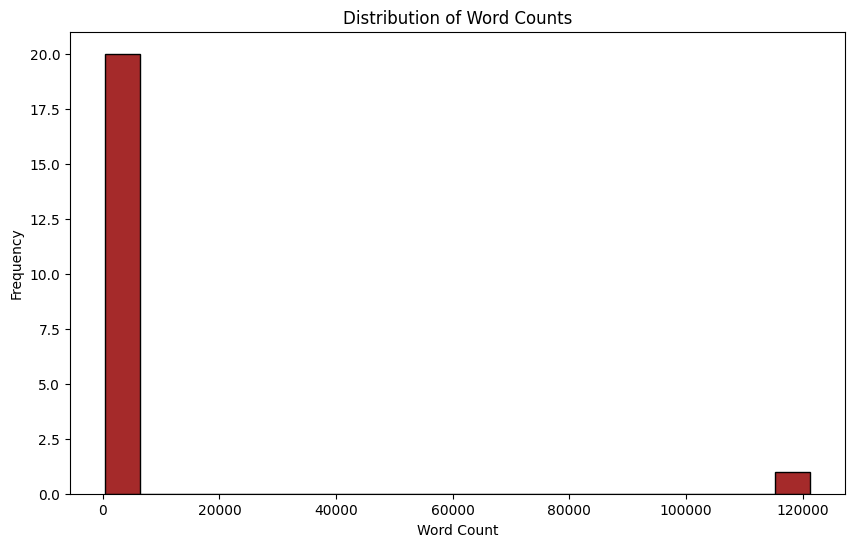

In [ ]:
# Word count
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Average length of articles
average_length = df['word_count'].mean()

# Minimum and maximum word count
min_word_count = df['word_count'].min()
max_word_count = df['word_count'].max()

print(f"Average length of articles: {average_length:.2f} words")
print(f"Minimum word count: {min_word_count} words")
print(f"Maximum word count: {max_word_count} words")

# Display the cleaned text and word count
print(df[['cleaned_text', 'word_count']])

# Visualize the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=20, color='brown', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.show()


*  Word Cloud (Display the most common words or phrases, providing a  visual representation of the main themes and topics discussed in the articles)

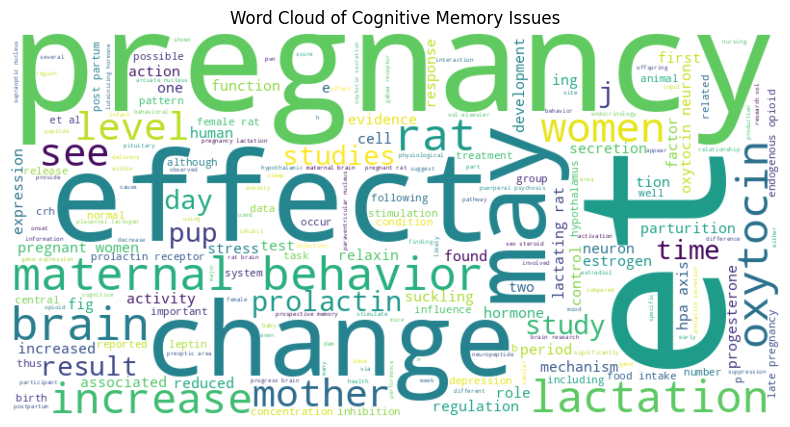

In [ ]:
# Concatenate all cleaned text into a single string
all_text = " ".join(df["cleaned_text"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Cognitive Memory Issues')
plt.show()






*  Frequency of Cognitive Memory Issues (Describes the frequency of different types of cognitive memory issues reported in the text data. It shows the number of occurrences of each type of issue, such as memory loss, difficulty concentrating, forgetfulness, brain fog, and others, providing insights into the prevalence of these issues in the dataset)



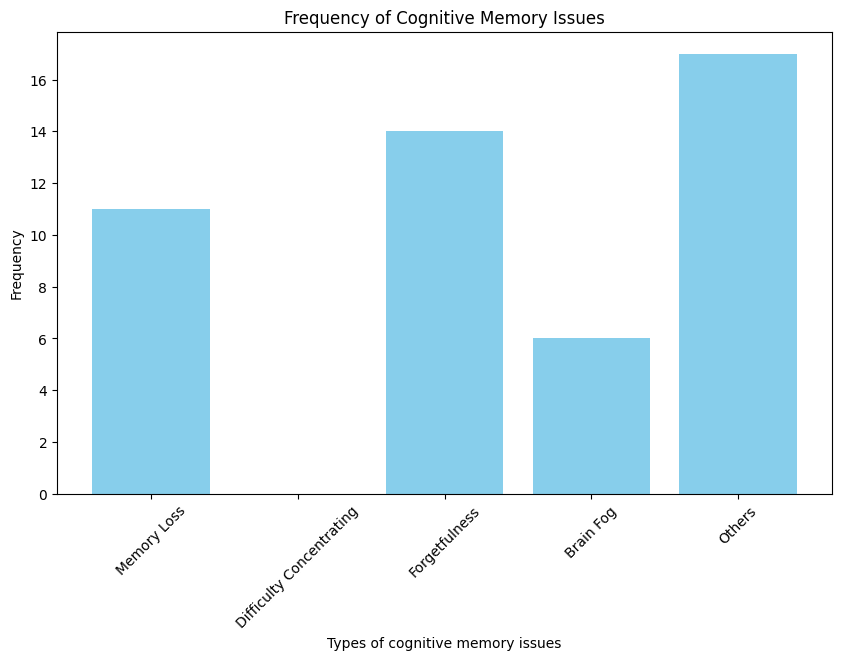

0     go to eudat website \ndata catalogue repositor...
1     (sections )(sections )\narticles research topi...
2     dr. aliabadi’s elective doublemastectomy journ...
3     health conditions discover plan connect subscr...
4     find a doctor conditions & treatments location...
5     2 \nlog in | register cart\n\n! \n\n\nhome all...
6     print subscriptions search jobs \nsupport the ...
7     searchsearch\nsign up \ntin this article getti...
8     epidural for labor painreviewed by cheryl axel...
9     health»live tv international edition + !!\nsha...
10    list of contributors \n\nm. altemus, departmen...
11    anokcialwebsiteoftheunitedstatesgovernment \n\...
12    advertisementparentinsharefullarticle 4\nparen...
13    short communication \nworking memory from preg...
14    what is mom brain and is it real? \n3/5/24, 3:...
15    memory loss in pregnancy: myth or fact? - inte...
16    memory and mood changes in pregnancy: a qualit...
17    is mom brain real? \nunderstanding and cop

In [ ]:
def cleaned_text(text):
    # Your cleaning logic here
    cleaned_text = text.lower()  # Example: convert text to lowercase
    return cleaned_text

# Apply cleaning function to 'text' column and store in 'cleaned_text' column
df["cleaned_text"] = df["text"].apply(cleaned_text)

# Define types of cognitive memory issues
types_of_issues = ['Memory Loss', 'Difficulty Concentrating', 'Forgetfulness', 'Brain Fog', 'Others']

# Initialize frequencies dictionary
frequencies = {issue: 0 for issue in types_of_issues}

# Count frequencies of each type of issue
for text in df["cleaned_text"]:
    for issue in types_of_issues:
        if issue.lower() in text:  # Example: use lowercase for comparison
            frequencies[issue] += 1

# Convert frequencies to DataFrame for plotting
df_frequencies = pd.DataFrame(list(frequencies.items()), columns=['Types of cognitive memory issues', 'Frequency'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_frequencies['Types of cognitive memory issues'], df_frequencies['Frequency'], color='skyblue')
plt.xlabel('Types of cognitive memory issues')
plt.ylabel('Frequency')
plt.title('Frequency of Cognitive Memory Issues')
plt.xticks(rotation=45)
plt.show()

# Display the cleaned text
print(df['cleaned_text'])


**Text Mining and NLP Analysis**
Goal is to extract key terms and topics related to cognitive memory issues during pregnancy, providing insights into the content and themes of the articles. This analysis helps identify patterns, trends, and prevalent topics in the literature, which can inform the development of the chatbox and enhance its ability to provide relevant and personalized support to pregnant women.

In [ ]:
# Text Mining and NLP
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Latent Dirichlet Allocation (LDA) for Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Extract key terms and topics
terms = tfidf_vectorizer.get_feature_names_out()
topics = [[terms[i] for i in topic.argsort()[:-6:-1]] for topic in lda.components_]

# Print topics
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")


Topic 1: pregnancy, women, memory, pregnant, et
Topic 2: brain, pregnancy, memory, women, mom
Topic 3: galea, male, female, animals, typically
Topic 4: galea, male, female, animals, typically
Topic 5: galea, male, female, animals, typically


**Sentiment Analysis and Comparison and Contrast:** This analysis assigns a sentiment score to each article, indicating its overall sentiment (positive, neutral, or negative). The sentiment scores can help understand the general tone and attitude of the articles towards cognitive memory issues during pregnancy.

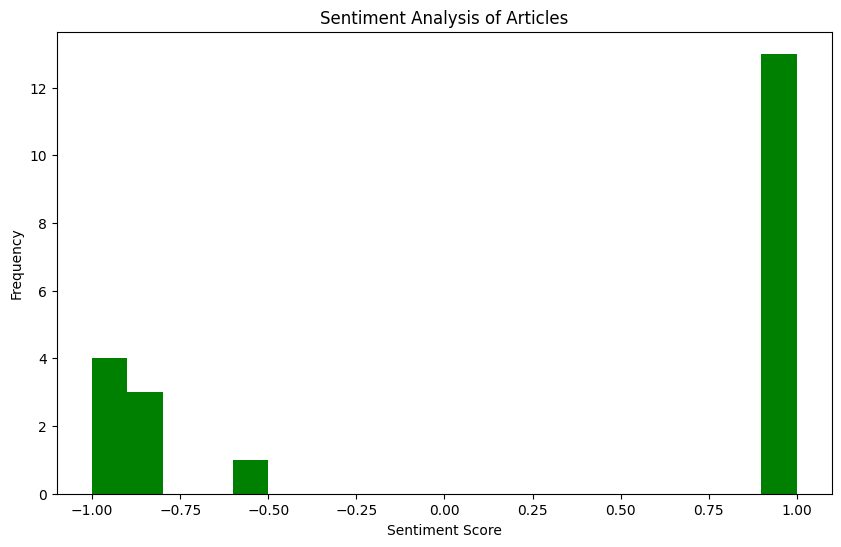

In [ ]:
# Sentiment Analysis
# Calculate the sentiment score for each cleaned text and store it in a new column
df['sentiment_score'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Explanation of sentiment scores:
# -1 indicates extremely negative sentiment.
# 0 indicates neutral sentiment.
# 1 indicates extremely positive sentiment.

# Comparison and Contrast
# For simplicity, let's just plot the sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=20, color='green')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Articles')
plt.show()

#Comparing Baseline GPT-2 Model Responses Using Raw and Cleaned Text Before Fine-Tuning

##*For the baseline model with raw text:*

In [ ]:
# Baseline GPT-2 Model Response before cleaning
def baseline_generate_response(raw_text):
    # Tokenize the raw text
    input_ids = tokenizer(raw_text, return_tensors='pt')['input_ids']
    # Generate output
    output = model.generate(input_ids, max_length=100, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
    # Decode the output
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

# Example usage
raw_text1 = "How does pregnancy affect memory?"
raw_text2 = "What are the effects of pregnancy on cognitive function?"
baseline_response_raw1 = baseline_generate_response(raw_text1)
baseline_response_raw2 = baseline_generate_response(raw_text2)
print("Baseline Response (Raw Text 1):", baseline_response_raw1.rstrip('!'))
print("Baseline Response (Raw Text 2):", baseline_response_raw2.rstrip('!'))

Baseline Response (Raw Text 1): How does pregnancy affect memory?

The answer is that it does.

The brain is a complex machine that is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is
Baseline Response (Raw Text 2): What are the effects of pregnancy on cognitive function?

The effects of pregnancy on cognitive function are not well understood. The most common cognitive deficits are memory loss, attention deficit hyperactivity disorder, and attention deficit hyperactivity disorder (ADHD).

The most common cognitive deficits are memory loss, attention deficit hyperactivity disorder, and attention deficit hyperactivity disorder (ADHD). The

##*For the baseline model with cleaned text:*

In [ ]:
# Baseline GPT-2 Model Response #Generate responses using the GPT-2 model
def baseline_generate_response(cleaned_text):
    # Tokenize the cleaned text
    input_ids = tokenizer.encode(cleaned_text, return_tensors='pt')
    # Generate output
    output = model.generate(input_ids, max_length=100, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id, attention_mask=input_ids.ne(tokenizer.eos_token_id))
    # Decode the output
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

# Example usage
cleaned_text1 = "How does pregnancy affect memory?"
cleaned_text2 = "What are the effects of pregnancy on cognitive function?"
baseline_response1 = baseline_generate_response(cleaned_text1)
baseline_response2 = baseline_generate_response(cleaned_text2)
print("Baseline Response 1:", baseline_response1)
print("Baseline Response 2:", baseline_response2)


Baseline Response 1: How does pregnancy affect memory?

The answer is that it does.

The brain is a complex machine that is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is constantly changing. It is
Baseline Response 2: What are the effects of pregnancy on cognitive function?

The effects of pregnancy on cognitive function are not well understood. The most common cognitive deficits are memory loss, attention deficit hyperactivity disorder, and attention deficit hyperactivity disorder (ADHD).

The most common cognitive deficits are memory loss, attention deficit hyperactivity disorder, and attention deficit hyperactivity disorder (ADHD). The most common cognitive

#Fine-Tuning the GPT-2 Model

Tokenization and Padding for Fine-Tuning GPT-2 Model

In [ ]:
# Define the maximum sequence length
max_length = 512

# Tokenize the cleaned text and truncate to max_length
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: tokenizer.encode(x[:max_length], return_tensors='pt'))

# Get the padding value from the tokenizer or use a default value
padding_value = tokenizer.pad_token_id if tokenizer.pad_token_id is not None else 0

# Pad or truncate the tokenized sequences to the maximum length
padded_sequences = pad_sequence([seq.squeeze(0)[:max_length] for seq in df['tokenized_text']], batch_first=True, padding_value=padding_value)

# Concatenate the padded sequences to match the expected size
input_ids = torch.cat(tuple(padded_sequences), dim=0)
labels = input_ids.clone()




Fine-Tuning: Ready to fine-tune the GPT-2 model

In [ ]:
#Check if 'input_ids' and 'labels' are defined
if 'input_ids' in locals() and 'labels' in locals():
    print("input_ids and labels are defined.")
else:
    print("input_ids and labels are not defined.")


input_ids and labels are defined.


In [ ]:
# Define hyperparameters
num_epochs = 10   # Increased to 10 epochs
learning_rate = 5e-5  # Adjusted learning rate
weight_decay = 0.01   # Adjusted weight decay
warmup_steps = 500    # Adjusted warmup steps
max_seq_length = 1024  # Maximum sequence length

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = get_scheduler("linear", optimizer, num_warmup_steps=warmup_steps, num_training_steps=len(df) * num_epochs)



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Manual Training Loop Method: In this method, the training loop is implemented manually, without using a custom trainer class.

In [ ]:
# Fine-tune the GPT-2 model
model.train()
for epoch in range(num_epochs):
    total_loss = 0.0
    for text in df['cleaned_text']:
        input_ids = tokenizer.encode(text, return_tensors='pt', max_length=max_seq_length, truncation=True)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, labels=input_ids)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
    average_loss = total_loss / len(df)
    print(f"Epoch {epoch+1}: Average Loss = {average_loss}")


Epoch 1: Average Loss = 3.9516185919443765
Epoch 2: Average Loss = 3.767175106775193
Epoch 3: Average Loss = 3.6138260591597784
Epoch 4: Average Loss = 3.5357826323736283
Epoch 5: Average Loss = 3.4542053654080345
Epoch 6: Average Loss = 3.373485656011672
Epoch 7: Average Loss = 3.274467865626017
Epoch 8: Average Loss = 3.1883621556418285
Epoch 9: Average Loss = 3.106229231471107
Epoch 10: Average Loss = 3.01540051755451


In [ ]:
# Save the fine-tuned model
model.save_pretrained('fine_tuned_gpt2_model')


In [ ]:
# Load the fine-tuned model
fine_tuned_model = GPT2LMHeadModel.from_pretrained('fine_tuned_gpt2_model')


Comparison of Baseline and Fine-Tuned GPT-2 Model Responses


In [ ]:
# Baseline GPT-2 Model Response
def baseline_generate_response(input_text):
    # Tokenize the input text
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    # Generate output
    output = model.generate(input_ids, max_length=100, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id, attention_mask=input_ids.ne(tokenizer.eos_token_id))
    # Decode the output
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

# Fine-Tuned GPT-2 Model Response
def fine_tuned_generate_response(input_text):
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    output = fine_tuned_model.generate(input_ids, max_length=100, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id, attention_mask=input_ids.ne(tokenizer.eos_token_id))
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response




In [ ]:
# Examples usage

# Example 1
input_text = "How does pregnancy affect memory?"
baseline_response = baseline_generate_response(input_text)
fine_tuned_response = fine_tuned_generate_response(input_text)
print("Baseline Response:", baseline_response)
print("Fine-Tuned Response:", fine_tuned_response)


# Example 2
input_text = "How can I improve my memory during pregnancy?"
baseline_response = baseline_generate_response(input_text)
fine_tuned_response = fine_tuned_generate_response(input_text)
print("Baseline Response:", baseline_response)
print("Fine-Tuned Response:", fine_tuned_response)

# Example 3
input_text = "Can pregnancy brain fog affect my ability to work or perform daily tasks?"
baseline_response = baseline_generate_response(input_text)
fine_tuned_response = fine_tuned_generate_response(input_text)
print("Baseline Response:", baseline_response)
print("Fine-Tuned Response:", fine_tuned_response)


# Example 4
input_text = "Should I be concerned if I'm experiencing more forgetfulness than usual during pregnancy?"
baseline_response = baseline_generate_response(input_text)
fine_tuned_response = fine_tuned_generate_response(input_text)
print("Baseline Response:", baseline_response)
print("Fine-Tuned Response:", fine_tuned_response)

Baseline Response: How can I improve my memory during pregnancy?

You can improve your memory during pregnancy by using a new memory app.


You can also use a new memory app to help you remember your pregnancy.

How do I get pregnant?


You can get pregnant during pregnancy by using a new memory app.

You can also use a new memory app to help you remember your pregnancy.


How do I get pregnant?

You can get pregnant during
Fine-Tuned Response: How can I improve my memory during pregnancy?

You can improve your memory during pregnancy by using a memory test.

You can also use a memory test to help you remember things you remember.

You can also learn more about how to improve your memory during pregnancy.

What is a memory test?

A memory test is a test that measures your memory during pregnancy.

It is a test that measures your memory during pregnancy.

It is a test that
Baseline Response: Can pregnancy brain fog affect my ability to work or perform daily tasks?

What is brain fog?

B

In [ ]:
# Compare the responses
print("Are the responses the same?")
print(baseline_response == fine_tuned_response)

Are the responses the same?
False


#Deployment: Chatbox Development: Define the Streamlit app interface and functionality

In [ ]:
# Chatbox interface
st.title("Memory Support Chatbox for Pregnant Women")
user_input = st.text_input("You:", "Enter your message here...")
if user_input:
    input_ids = tokenizer.encode(user_input, return_tensors='pt')
    reply_ids = model.generate(input_ids, max_length=100, pad_token_id=tokenizer.eos_token_id)
    reply_text = tokenizer.decode(reply_ids[0], skip_special_tokens=True)
    st.text_area("Chatbot:", value=reply_text, height=200)


# Text Analysis
st.subheader("Text Analysis")

# Word Cloud
st.subheader("Word Cloud")
all_text = " ".join(df["cleaned_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
st.pyplot()

2024-03-10 05:19:26.346 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Chatbox interface
st.title("Memory Support Chatbox for Pregnant Women")
user_input = st.text_input("You:", "Enter your message here...")
if user_input:
    input_ids = tokenizer.encode(user_input, return_tensors='pt')
    reply_ids = model.generate(input_ids, max_length=100, pad_token_id=tokenizer.eos_token_id)
    reply_text = tokenizer.decode(reply_ids[0], skip_special_tokens=True)
    st.text_area("Chatbot:", value=reply_text, height=200)
    st.write(reply_text)  # Display the reply_text

# Text Analysis
st.subheader("Text Analysis")

# Word Cloud
st.subheader("Word Cloud")
all_text = " ".join(df["cleaned_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
st.pyplot()


DeltaGenerator()

#Model Evaluation

In [ ]:
 #Generate sample responses from the model to ensure it provides relevant and coherent advice

# Sample prompts
sample_prompts = [
    "What causes pregnancy brain fog?",
    "How does pregnancy affect the brain?",
    "How can I improve my memory during pregnancy?",
    "Can pregnancy brain fog affect my ability to work or perform daily tasks?",
]

# Generate responses
for prompt in sample_prompts:
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    output = model.generate(input_ids, max_length=100, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id, attention_mask=input_ids.ne(tokenizer.eos_token_id))
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    print("Response:", response)

##Visualization of Model Responses to Sample Prompts

Can help one  understand the nature of the responses generated by the language model and
identify common patterns or topics across the responses

In [ ]:
#Sample prompts
sample_prompts = [
    "What causes pregnancy brain fog?",
    "How does pregnancy affect the brain?",
    "How can I improve my memory during pregnancy?",
    "Can pregnancy brain fog affect my ability to work or perform daily tasks?",
]

# Generate responses from the model
data = []
for prompt in sample_prompts:
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    output = model.generate(input_ids, max_length=100, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id, attention_mask=input_ids.ne(tokenizer.eos_token_id))
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    data.append({"prompt": prompt, "response": response})

# Create a DataFrame from the generated responses
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Use the generated responses for visualization
# For example, you can create a pie chart based on the responses
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie([len(response.split()) for response in df['response']], labels=df['prompt'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of response lengths for sample prompts')
plt.axis('equal')
plt.show()
